# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
import os

practice_dir_path = 'C:/Users/zhjck/TimeSeriesLabs/practice/06 Chains/'
os.chdir(practice_dir_path)

In [3]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

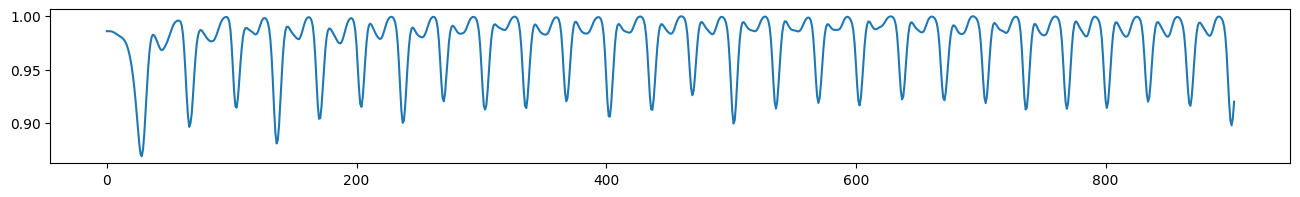

In [7]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [22]:
m = 30 
mp = stumpy.stump(ts, m)  # возвращает (matrix profile, profile index)


# находим уникальные соседи
neighbors = mp[:,1]

# ищем самую длинную последовательность соседей
max_chain_len = 0
best_start_idx = None
best_chain = []

for i in range(len(neighbors)):
    chain = [i]
    j = i
    while j < len(neighbors) and neighbors[j] > j:
        j = neighbors[j]
        chain.append(j)
    if len(chain) > max_chain_len:
        max_chain_len = len(chain)
        best_start_idx = i
        best_chain = chain


print("Самая длинная цепочка начинается с индекса:", best_start_idx)
print("Индексы сегментов этой цепочки:", best_chain)
print("Длина цепочки:", max_chain_len)


Самая длинная цепочка начинается с индекса: 19
Индексы сегментов этой цепочки: [19, 128, 494, 629, 826]
Длина цепочки: 5


❓ Проанализируйте и изложите содержательный смысл полученных результатов.


На графике можно сразу увидеть структуру повторений во временном ряде.

Эволюционирующий шаблон не обязательно идентичен во всех сегментах, но сильно похож.

Красные полосы помогают понять:
где сигнал повторяется,
как часто повторения происходят,
длину и регулярность повторяющихся паттернов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

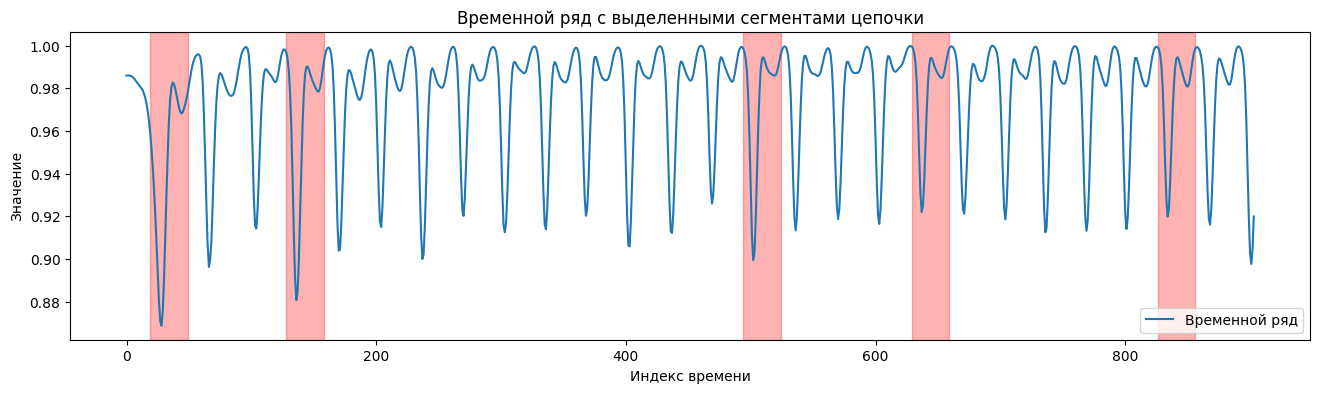

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# ts — временной ряд
# best_chain — индексы сегментов самой длинной цепочки
# m — длина шаблона

plt.figure(figsize=(16,4))
plt.plot(ts, label="Временной ряд")  # сам ряд
for idx in best_chain:
    plt.axvspan(idx, idx+m, color='red', alpha=0.3)  # красные полосы для сегментов
plt.title("Временной ряд с выделенными сегментами цепочки")
plt.xlabel("Индекс времени")
plt.ylabel("Значение")
plt.legend()
plt.show()


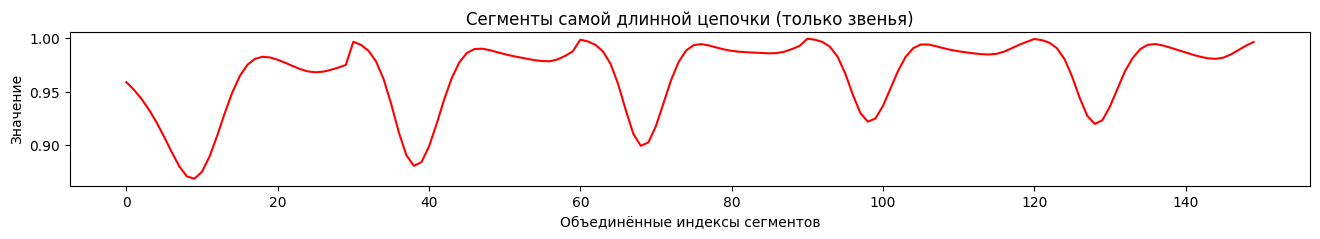

In [26]:

segments = np.zeros(0)

for idx in best_chain:
    segments = np.concatenate([segments, ts[idx:idx+m]])

plt.figure(figsize=(16,2))
plt.plot(segments, color='red')
plt.title("Сегменты самой длинной цепочки (только звенья)")
plt.xlabel("Объединённые индексы сегментов")
plt.ylabel("Значение")
plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Практический смысл результатов

Эволюционирующие шаблоны помогают понять структуру временного ряда:

Где повторяются характерные движения/паттерны

Как часто они появляются

Насколько стабильны их характеристики

В задачах анализа сигналов или сенсорных данных это важно для:

Выделения повторяющихся событий

Обнаружения аномалий (сегменты, сильно отличающиеся от цепочки)

Подготовки данных для кластеризации или обучения моделей

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

Среднеквадратичная ошибка предсказания последнего звена: 0.0001036783873852329


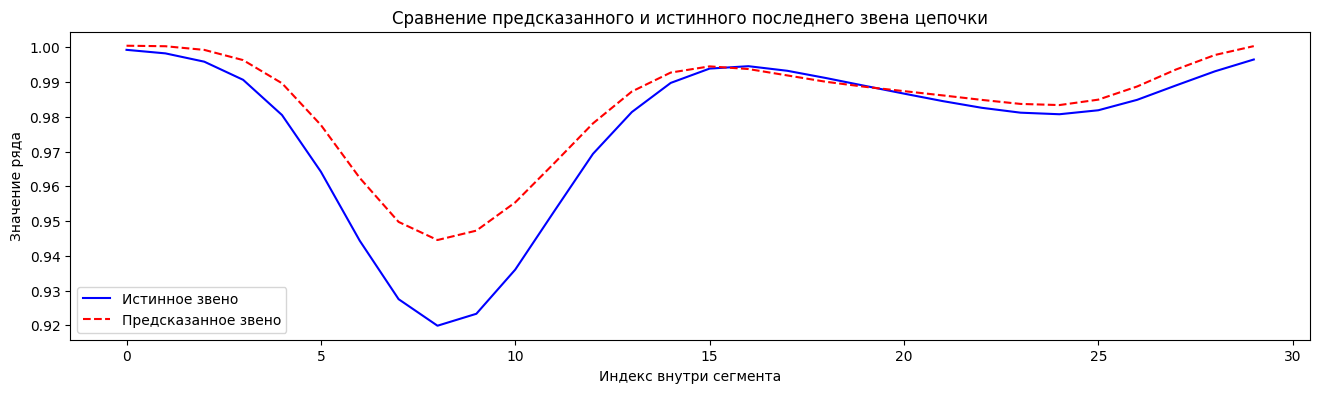

In [28]:
import numpy as np
import matplotlib.pyplot as plt


# Берём два предыдущих звена
seg_prev2 = ts[best_chain[-3] : best_chain[-3]+m]  # предпоследнее
seg_prev1 = ts[best_chain[-2] : best_chain[-2]+m]  # последнее до целевого

# Линейная экстраполяция
predicted_seg = 2 * seg_prev1 - seg_prev2

# Истинное значение последнего звена
true_seg = ts[best_chain[-1] : best_chain[-1]+m]

# Сравнение с истинным сегментом
mse = np.mean((predicted_seg - true_seg)**2)
print("Среднеквадратичная ошибка предсказания последнего звена:", mse)

# Визуализация
plt.figure(figsize=(16,4))
plt.plot(true_seg, label="Истинное звено", color='blue')
plt.plot(predicted_seg, label="Предсказанное звено", color='red', linestyle='--')
plt.title("Сравнение предсказанного и истинного последнего звена цепочки")
plt.xlabel("Индекс внутри сегмента")
plt.ylabel("Значение ряда")
plt.legend()
plt.show()


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Этот метод работает, если паттерн в цепочке развивается относительно линейно.

Разность между двумя предыдущими сегментами позволяет экстраполировать тенденцию, что подходит для эволюционирующих шаблонов.

Если форма сигнала меняется нелинейно, точность может падать → можно использовать более сложные модели (например, DTW-подгонку, линейную регрессию или RNN).